# Houses in USA DataScience Project - Helping the House Rocket CEO 

## Dataset Overview

**Dataset upload**

In [67]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Dataset Overview**

In [2]:
df = pd.read_csv('/home/thamirisbrandao/code/thamirisbrandao/house_salesUSA/house_salesUSA/data/kc_house_data.csv', parse_dates=['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [56]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

## DATA CLEANING

**Preprocessing Dataset**

In [5]:
duplicate_count = len(df)-len(df.drop_duplicates()) # Original data lenght minus data length without duplicates

duplicate_count

0

In [6]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.isnull().sum().sort_values(ascending=False)/len(df)

id               0.0
grade            0.0
sqft_living15    0.0
long             0.0
lat              0.0
zipcode          0.0
yr_renovated     0.0
yr_built         0.0
sqft_basement    0.0
sqft_above       0.0
condition        0.0
date             0.0
view             0.0
waterfront       0.0
floors           0.0
sqft_lot         0.0
sqft_living      0.0
bathrooms        0.0
bedrooms         0.0
price            0.0
sqft_lot15       0.0
dtype: float64

## DATA ANALYSIS

** Descriptive Analysis **

**👇  Why the CEO has raised questions about the business plan? If you were him, why would you ask that? Would the CEO like to raise revenue? The company is going well?**

👇  Porque o CEO fez essas perguntas? Se você fosse ele, porque você perguntaria isso? Quer aumentar receita? A empresa está indo bem?

Sales in 2015 has been 47.95% lower than 2014


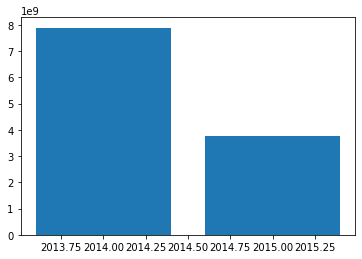

In [65]:
df['df_year'] = df['date'].dt.year
houses_per_y = df.groupby('df_year')['price'].sum().reset_index()
houses_per_y
plt.bar(houses_per_y.df_year, houses_per_y.price)
vendas_2014 = houses_per_y.price[0]
vendas_2015 = round((houses_per_y.price[1]/vendas_2014)*100,2)
#print(vendas_2014)
print(f"Sales in 2015 has been {vendas_2015}% lower than 2014")

**👇 Which attributes make houses more or less attractive to buyers and sellers?**

👇  Analisar quais atributos tornam as casas mais ou menos atrativas aos compradores e vendedores?

**Correlation**

'Price is correlation above of 0.5 with bathrooms, sqft_living, grade, sqft_above and sqft_living'

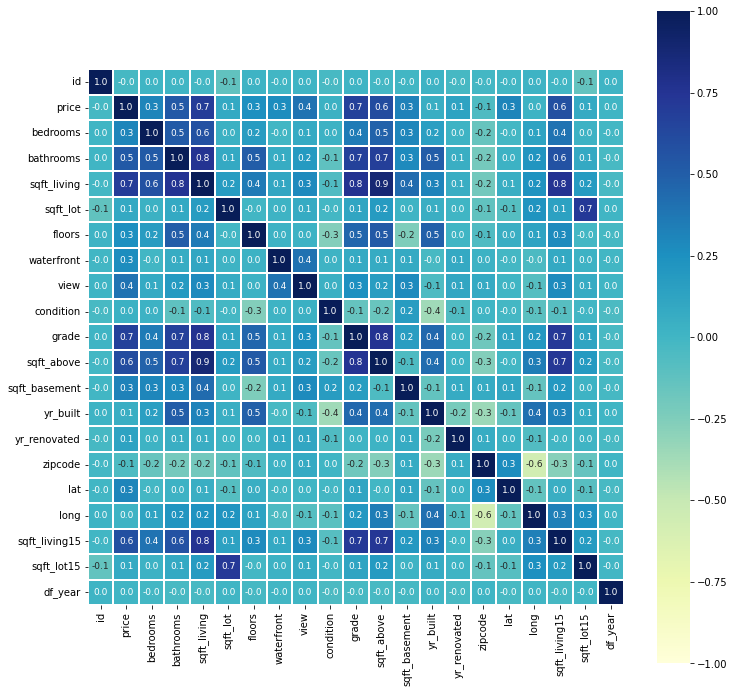

In [70]:
# corr = df.corr() -- Pearson Correlation

fig, ax = plt.subplots(figsize = (12, 12))
# Heatmap
sns.heatmap(df.corr(), cmap = "YlGnBu", annot = True, fmt = ".1f", annot_kws = {"fontsize": 9},
            vmin = -1, vmax = 1, square = True, linewidths = 0.01, linecolor = "white", cbar = True)

sns.despine(top = True, right = True, left = True, bottom = True)


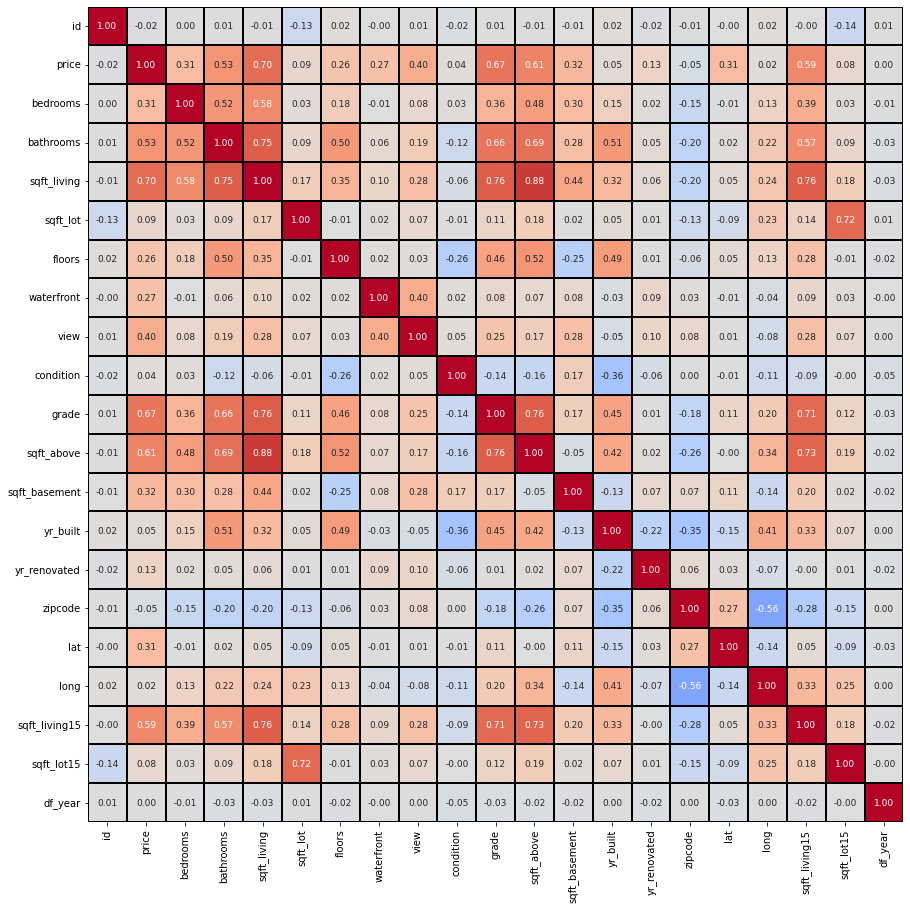

In [19]:
fig, ax = plt.subplots(figsize = (15, 15))
# Heatmap
sns.heatmap(df.corr(), cmap = "coolwarm", annot = True, fmt = ".2f", annot_kws = {"fontsize": 9},
            vmin = -1, vmax = 1, square = True, linewidths = 0.01, linecolor = "black", cbar = False)

sns.despine(top = True, right = True, left = True, bottom = True)

In [73]:
f'Price is correlation above of 0.5 with sqft_living, grade, sqft_above, sqft_living and bathrooms'
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
df_year          0.003576
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

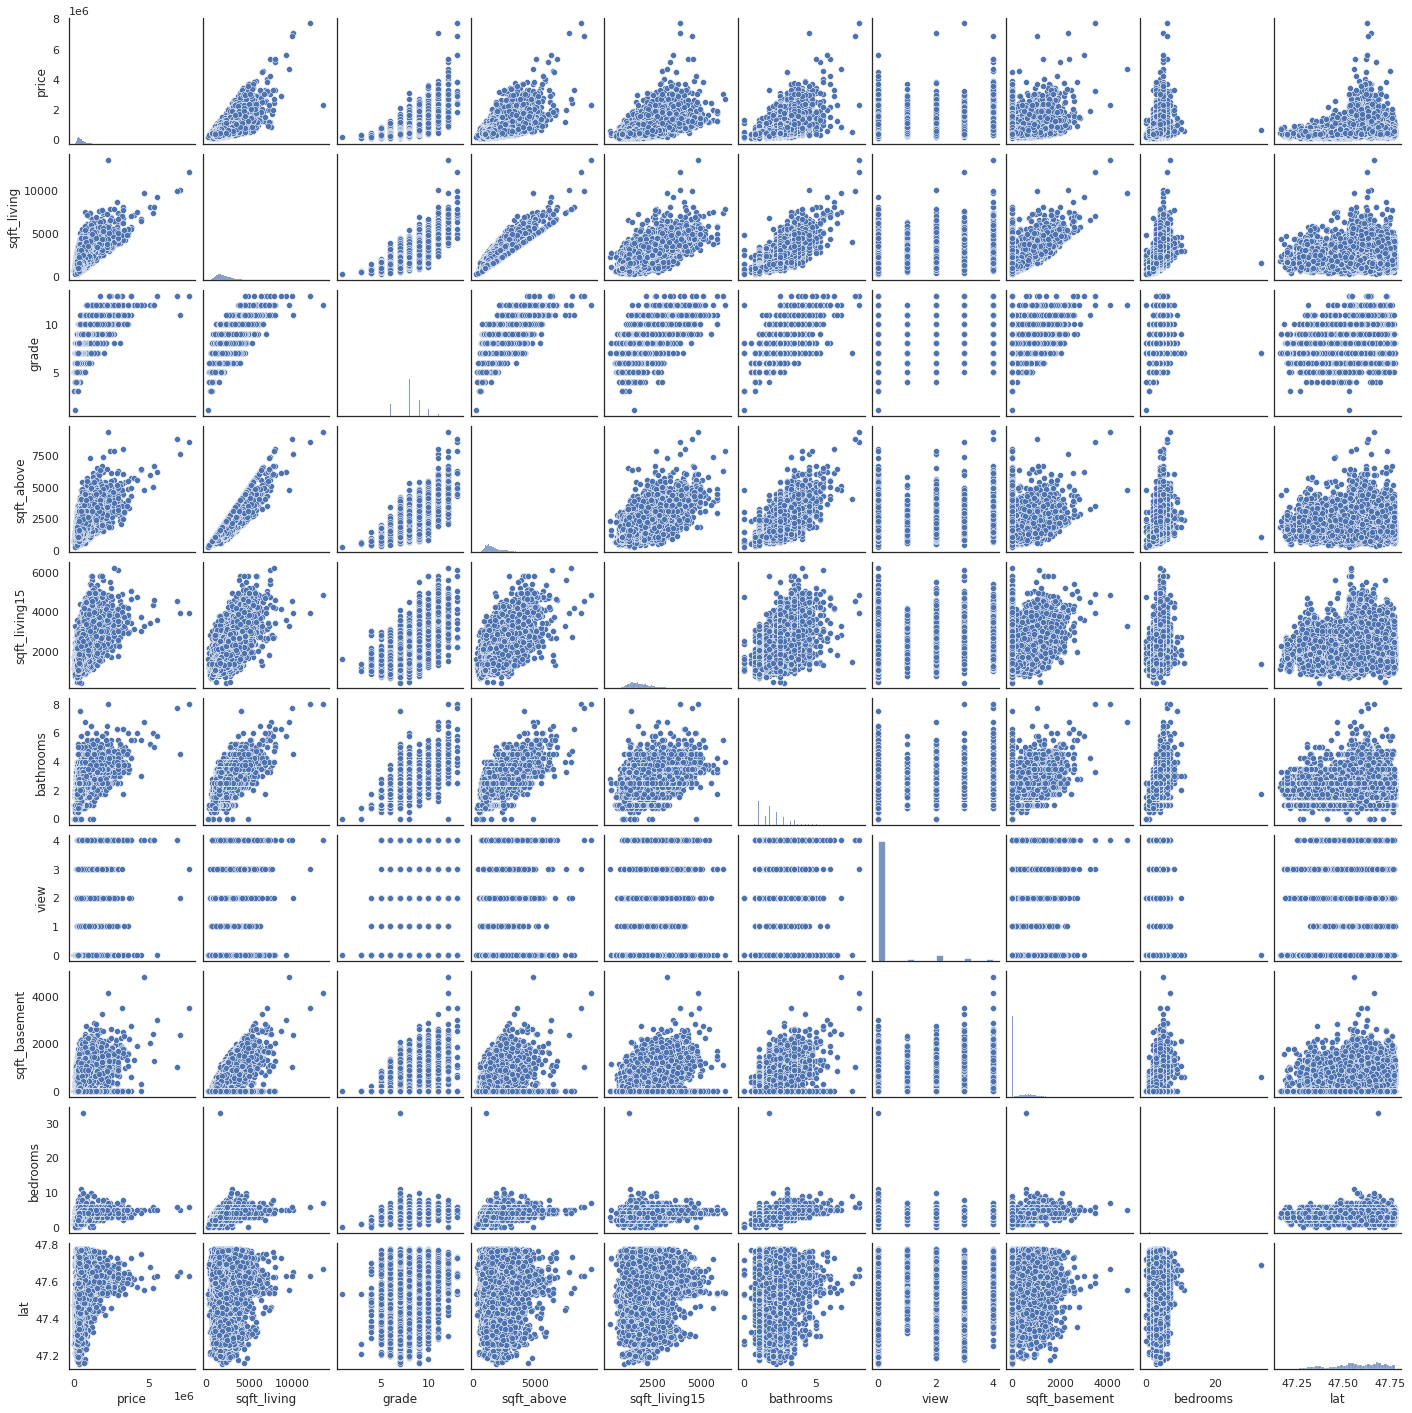

In [77]:
df_corr_more30 = df[['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat']]

sns.set(style='white')
sns.pairplot(df_corr_more30, height=2)
plt.show()

In [78]:
df_summary = df[['price', 'bedrooms', 'bathrooms', 'sqft_living']].sort_values(by = 'price', ascending=False)
df_summary.head(20)

,price,bedrooms,bathrooms,sqft_living
7252,7700000.0,6,8.00,12050
3914,7062500.0,5,4.50,10040
9254,6885000.0,6,7.75,9890
4411,5570000.0,5,5.75,9200
1448,5350000.0,5,5.00,8000
1315,5300000.0,6,6.00,7390
1164,5110800.0,5,5.25,8010
8092,4668000.0,5,6.75,9640
2626,4500000.0,5,5.50,6640
8638,4489000.0,4,3.00,6430


In [80]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 

corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df.head(20)

,feature_1,feature_2,correlation
95,sqft_living,sqft_above,0.876597
235,sqft_above,sqft_living,0.876597
214,grade,sqft_living,0.762704
94,sqft_living,grade,0.762704
102,sqft_living,sqft_living15,0.756420
382,sqft_living15,sqft_living,0.756420
241,sqft_above,grade,0.755923
221,grade,sqft_above,0.755923
87,sqft_living,bathrooms,0.754665
67,bathrooms,sqft_living,0.754665


**👇 Are houses with many bedrooms more expensive? Why? How many rooms does the price increase from? What is the price increment for each room added?**

👇 Casas com muitos quartos são mais caras? Porque? A partir de quantos quartos o preço aumenta? Qual o incremento de preço por cada quarto adicionado?

**👇 Are houses with garages more expensive? Why?**

👇 Casas com garagens são mais caras? Porque?

**👇 Are the most expensive houses in the center of the city? Which region? Is there anything in the region that correlates with the home's sale value? malls? mountains? Famous people?**

👇 As casas mais caras estão no centro? Qual a região? Existe alguma coisa na região que tem correlação com valor de venda da casa? Shoppings? Montanhas? Pessoas Famosas?

### Levantando Hipóteses sobre o Comportamento do Negócio

#### Relação do preço com outras features

In [25]:
df_h_price= df.sort_values(by=['price'], ascending=False)
df_h_price.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,df_year
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,2014
3914,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,...,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,2014
9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,...,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,2014
4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,...,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,2014
1448,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,...,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,2015
1315,7558700030,2015-04-13,5300000.0,6,6.00,7390,24829,2.0,1,4,...,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619,2015
1164,1247600105,2014-10-20,5110800.0,5,5.25,8010,45517,2.0,1,4,...,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788,2014
8092,1924059029,2014-06-17,4668000.0,5,6.75,9640,13068,1.0,1,4,...,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454,2014
2626,7738500731,2014-08-15,4500000.0,5,5.50,6640,40014,2.0,1,4,...,6350,290,2004,0,98155,47.7493,-122.280,3030,23408,2014
8638,3835500195,2014-06-18,4489000.0,4,3.00,6430,27517,2.0,0,0,...,6430,0,2001,0,98004,47.6208,-122.219,3720,14592,2014


In [26]:
df_h_price= df.sort_values(by=['date'], ascending=True)
df_h_price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,df_year
16768,5561000190,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,0,...,1970,0,1977,0,98027,47.4635,-121.991,2340,35100,2014
9596,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,...,1700,900,1951,0,98117,47.6833,-122.400,2380,4750,2014
9587,1024069009,2014-05-02,675000.0,5,2.50,2820,67518,2.0,0,0,...,2820,0,1979,0,98029,47.5794,-122.025,2820,48351,2014
20602,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,0,...,3310,0,2012,0,98065,47.5150,-121.870,2380,5000,2014
11577,5056500260,2014-05-02,440000.0,4,2.25,2160,8119,1.0,0,0,...,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,1422700040,2015-05-14,183000.0,3,1.00,1170,7320,1.0,0,0,...,1170,0,1962,0,98188,47.4685,-122.282,2040,7320,2015
928,8730000270,2015-05-14,359000.0,2,2.75,1370,1140,2.0,0,0,...,1080,290,2009,0,98133,47.7052,-122.343,1370,1090,2015
5637,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0,0,...,1870,0,1960,0,98007,47.5951,-122.144,1870,7650,2015
13053,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0,0,...,720,670,1941,0,98115,47.6914,-122.308,920,6380,2015


In [27]:
df_h_price.groupby('lat').agg({'price':'sum'}).reset_index()

,lat,price
0,47.1559,380000.0
1,47.1593,687000.0
2,47.1622,750000.0
3,47.1647,335000.0
4,47.1764,245000.0
...,...,...
5029,47.7771,904950.0
5030,47.7772,1250000.0
5031,47.7774,395000.0
5032,47.7775,800560.0


In [28]:
df_h_price.groupby('lat').count()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,long,sqft_living15,sqft_lot15,df_year
lat,,,,,,,,,,,,,,,,,,,,,
47.1559,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
47.1593,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
47.1622,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
47.1647,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
47.1764,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47.7771,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
47.7772,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
47.7774,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [29]:
lat_min = df_h_price['lat'].min()
lat_max = df_h_price['lat'].max()
(lat_max-lat_min)*111/1 #as casas estão numa área de 69km 

69.00869999999966

In [30]:
df_h_price[df_h_price['lat'] == lat_min]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,df_year
3295,9413400165,2014-06-24,380000.0,3,2.25,1860,15559,2.0,0,0,...,1860,0,1963,0,98022,47.1559,-121.646,1110,11586,2014


In [31]:
df_h_price[df_h_price['lat'] == lat_max]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,df_year
17464,5500200010,2014-10-14,389950.0,3,1.75,1580,9049,1.0,0,0,...,1580,0,1966,0,98177,47.7776,-122.375,2100,8446,2014
306,7280300196,2015-04-03,550000.0,4,2.75,1800,7750,1.0,0,0,...,1400,400,1965,0,98177,47.7776,-122.384,1800,8275,2015
15766,2644300005,2015-04-12,407500.0,4,2.50,1900,9075,2.0,0,0,...,1900,0,1988,0,98133,47.7776,-122.352,1800,8460,2015


In [32]:
df_h_price.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,df_year
16768,5561000190,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,0,...,1970,0,1977,0,98027,47.4635,-121.991,2340,35100,2014
9596,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,...,1700,900,1951,0,98117,47.6833,-122.400,2380,4750,2014
9587,1024069009,2014-05-02,675000.0,5,2.50,2820,67518,2.0,0,0,...,2820,0,1979,0,98029,47.5794,-122.025,2820,48351,2014


In [33]:
#df['date'][2].strftime("%m")
#df_s.head(14634)

# Base Modelling

👇Prepare the feature set `X` and target `y`. Remember that we want to model the `SalePrice` with the preprocessed features.

In [34]:
X = df.drop(columns=['price', 'id', 'date'])
y = df['price']

In [35]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,df_year
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000


👇 Cross validate a linear regression model. Save the score under variable name `base_model_score`.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

base_model_score = scores.mean()

base_model_score

0.6967549795732084

# Feature Permutation

👇 Perform feature permutation, and rank features by order of importance.

In [37]:
import numpy as np
from sklearn.inspection import permutation_importance

model = LinearRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(model, X, y, n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance'] # Change column names

importance_df.sort_values(by="feature importance", ascending = False) # Order by importance

,feature,feature importance
8,grade,0.189308
2,sqft_living,0.152927
14,lat,0.10437
11,yr_built,0.087612
9,sqft_above,0.05093
5,waterfront,0.037897
6,view,0.024026
0,bedrooms,0.016587
1,bathrooms,0.015027
13,zipcode,0.014375


# Reduced complexity model

👇 Drop the the weak features and cross-validate a new model. You should aim to maintain a score close to the previous one. Save the score under variable name `simplified_model_score`.

In [38]:
X = X.drop(columns=['floors','sqft_lot','yr_renovated','sqft_lot15','sqft_living15']) # Drops weak features

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

simplified_model_score = scores.mean()

simplified_model_score

0.6961570797450614

# Multivariate Linear Regression (with statsmodel)

### Model to price ~ grade

In [39]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
model1 = smf.ols(formula = 'price ~ grade', data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.736e+04
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:20:16   Log-Likelihood:            -3.0123e+05
No. Observations:               21613   AIC:                         6.025e+05
Df Residuals:                   21611   BIC:                         6.025e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.056e+06   1.23e+04    -86.166      0.000   -1.08e+06   -1.03e+06
grade       2.085e+05   1582.103    131.760      0.000    2.05e+05    2.12e+05
==============================================================================
Omnibus:                    19920.375   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2053087.758
Skew:                           4.090   Prob(JB):                         0.00
Kurtosis:                      50.042   Cond. No.                         51.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
features = df.columns.to_list()

In [41]:
del features[0:3]

In [42]:
formula = "price ~ " + ' + '.join(features)
formula

'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15 + df_year'

## Normalization of the features

In [43]:
f_standardized = df.copy()
for f in features:
    mu = df[f].mean()
    sigma = df[f].std()
    f_standardized[f] = df[f].map(lambda x: (x - mu) / sigma)
f_standardized

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,df_year
0,7129300520,2014-10-13,221900.0,-0.398728,-1.447430,-0.979812,-0.228316,-0.915406,-0.087171,-0.305752,...,-0.734691,-0.658666,-0.544885,-0.210124,1.870108,-0.352564,-0.306072,-0.943333,-0.260709,-0.690639
1,6414100192,2014-12-09,538000.0,-0.398728,0.175603,0.533622,-0.189881,0.936484,-0.087171,-0.305752,...,0.460830,0.245136,-0.681063,4.746568,0.879547,1.161541,-0.746324,-0.432676,-0.187863,-0.690639
2,5631500400,2015-02-25,180000.0,-1.473925,-1.447430,-1.426221,-0.123296,-0.915406,-0.087171,-0.305752,...,-1.229805,-0.658666,-1.293862,-0.210124,-0.933367,1.283507,-0.135652,1.070115,-0.172371,1.447868
3,2487200875,2014-12-09,604000.0,0.676469,1.149422,-0.130547,-0.244009,-0.915406,-0.087171,-0.305752,...,-0.891678,1.397483,-0.204441,-0.210124,1.085135,-0.283281,-1.271787,-0.914153,-0.284515,-0.690639
4,1954400510,2015-02-18,510000.0,-0.398728,-0.149004,-0.435412,-0.169649,-0.915406,-0.087171,-0.305752,...,-0.130892,-0.658666,0.544535,-0.210124,-0.073634,0.409541,1.199307,-0.272184,-0.192844,1.447868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,-0.398728,0.500209,-0.598732,-0.337417,2.788374,-0.087171,-0.305752,...,-0.312032,-0.658666,1.293512,-0.210124,0.468371,1.004935,-0.938047,-0.666119,-0.412371,-0.690639
21609,6600060120,2015-02-23,400000.0,0.676469,0.500209,0.250534,-0.224381,0.936484,-0.087171,-0.305752,...,0.629894,-0.658666,1.463734,-0.210124,1.272034,-0.356172,-1.051660,-0.228413,-0.203942,1.447868
21610,1523300141,2014-06-23,402101.0,-1.473925,-1.772037,-1.154021,-0.332129,0.936484,-0.087171,-0.305752,...,-0.927906,-0.658666,1.293512,-0.210124,1.234654,0.247882,-0.604307,-1.410220,-0.394132,-0.690639
21611,291310100,2015-01-16,400000.0,-0.398728,0.500209,-0.522516,-0.307069,0.936484,-0.087171,-0.305752,...,-0.227500,-0.658666,1.123290,-0.210124,-0.952056,-0.184410,1.028887,-0.841202,-0.420502,1.447868


### Model to normalize features without id, date, price

In [44]:
model_OS = smf.ols(formula = formula, data = f_standardized).fit()
print(model_OS.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2816.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:20:17   Log-Likelihood:            -2.9455e+05
No. Observations:               21613   AIC:                         5.891e+05
Df Residuals:                   21594   BIC:                         5.893e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.401e+05   1365.539    395.513

### Model to normalize features without floors 

In [45]:
del features[4]

In [46]:
features_OS_II = features

In [47]:
formula_OS = "price ~ " + ' + '.join(features_OS_II)
formula_OS

'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15 + df_year'

In [48]:
model_OS = smf.ols(formula = formula_OS, data = f_standardized).fit()
print(model_OS.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2981.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:20:17   Log-Likelihood:            -2.9455e+05
No. Observations:               21613   AIC:                         5.891e+05
Df Residuals:                   21595   BIC:                         5.893e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.401e+05   1365.639    395.484

### Model to features without id, date, price

In [49]:
model_A = smf.ols(formula = formula, data = df).fit()
print(model_A.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2816.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:20:18   Log-Likelihood:            -2.9455e+05
No. Observations:               21613   AIC:                         5.891e+05
Df Residuals:                   21594   BIC:                         5.893e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -5.46e+07   6.59e+06     -8.282

### Model to features without floors

In [50]:
model_B = smf.ols(formula = formula_OS, data = df).fit()
print(model_OS.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2981.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:20:18   Log-Likelihood:            -2.9455e+05
No. Observations:               21613   AIC:                         5.891e+05
Df Residuals:                   21595   BIC:                         5.893e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.401e+05   1365.639    395.484

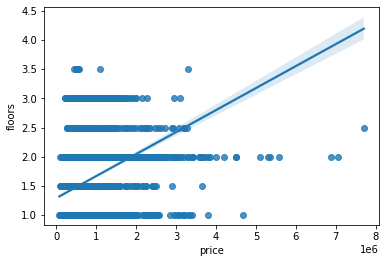

In [51]:
sns.regplot(x='price', y='floors', data=df);

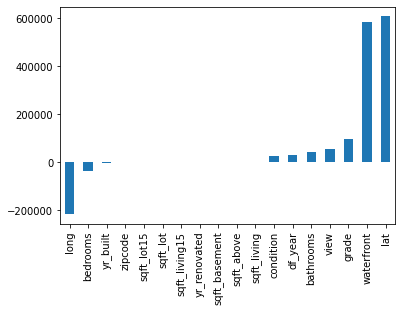

In [52]:
model_B.params[1:].sort_values().plot(kind='bar');

In [53]:
predicted_review_score = model_B.predict(df[features_OS_II])
predicted_review_score

0        199942.534649
1        724155.998014
2        399344.964235
3        449578.930820
4        465498.568074
             ...      
21608    466871.053423
21609    459406.646800
21610    129752.792494
21611    404248.150037
21612    132374.109408
Length: 21613, dtype: float64

In [54]:
residuals = predicted_review_score - df.price
residuals

0        -21957.465351
1        186155.998014
2        219344.964235
3       -154421.069180
4        -44501.431926
             ...      
21608    106871.053423
21609     59406.646800
21610   -272348.207506
21611      4248.150037
21612   -192625.890592
Length: 21613, dtype: float64

In [55]:
RMSE = (residuals.map(lambda x: x**2).sum() / len(residuals))**0.5
RMSE

200683.86489859025

2. Analisar quais atributos tornam as casas mais ou menos atrativas aos compradores e vendedores?